# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [8]:
#build the url to access information
base_url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{base_url}&appid={weather_api_key}&units={units}&q="

#create lists for needed info
city_name = []
city_id = []
lat = []
lng = []
temp = []
humidity = []
clouds = []
wind_spd = []
country = []
date = []
index_counter = 0
set_counter = 1

print("Beginning Data Retrieval ")
print("-----------------------------")

for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        city_id.append(response["id"])
        country.append(response["sys"]["country"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        clouds.append(response["clouds"]["all"])
        wind_spd.append(response["wind"]["speed"])
        date.append(response["dt"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
            
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} | {city}")
        
    except:
        print("City not found. Skipping...")
        
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")


Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 | vaini
Processing Record 2 of Set 1 | esperance
Processing Record 3 of Set 1 | coahuayana
Processing Record 4 of Set 1 | norilsk
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | kuchinarai
Processing Record 9 of Set 1 | half moon bay
Processing Record 10 of Set 1 | thompson
Processing Record 11 of Set 1 | sao joao da barra
Processing Record 12 of Set 1 | almaznyy
Processing Record 13 of Set 1 | longonjo
Processing Record 14 of Set 1 | hermanus
City not found. Skipping...
Processing Record 15 of Set 1 | kodiak
Processing Record 16 of Set 1 | makakilo city
Processing Record 17 of Set 1 | east london
Processing Record 18 of Set 1 | de aar
Processing Record 19 of Set 1 | arraial do cabo
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | zeya
City not found. Skipping...
Processing Record 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
city_weather = pd.DataFrame({    
    "ID" : city_id,
    "City" : city_name,
    "Lat" : lat,
    "Lng" : lng,
    "Max Temp" : temp,
    "Humidity" : humidity,
    "Cloudiness" : clouds,
    "Wind Speed" : wind_spd,
    "Country" : country,
    "Date" : date
})

city_weather

,ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,4032243,Vaini,-21.2000,-175.2000,24.09,100,20,4.12,TO,1660027970
1,2071860,Esperance,-33.8667,121.9000,11.93,68,100,8.49,AU,1660027971
2,4013679,Coahuayana Viejo,18.7333,-103.6833,25.58,87,100,1.21,MX,1660027973
3,1497337,Noril'sk,69.3535,88.2027,17.46,88,100,2.40,RU,1660027974
4,4030556,Rikitea,-23.1203,-134.9692,23.15,80,99,8.72,PF,1660027976
...,...,...,...,...,...,...,...,...,...,...
571,3625929,Tucupita,9.0622,-62.0510,22.82,99,69,1.00,VE,1660028893
572,359792,Aswān,24.0934,32.9070,37.15,19,4,6.94,EG,1660028895
573,553766,Kamenka,51.3223,42.7678,29.35,29,6,2.20,RU,1660028896
574,1524296,Esil,51.9556,66.4042,24.11,40,17,8.17,KZ,1660028897


In [10]:
city_weather.to_csv('output_data/city_weather.csv', index=False)

In [11]:
#use the .describe function
city_weather[["Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]].describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000
mean,21.412451,21.593024,21.570521,68.196181,54.696181,3.681007
std,32.861484,90.903458,7.655669,21.786108,41.484032,2.574756
min,-54.800000,-175.200000,-0.620000,1.000000,0.000000,0.000000
25%,-5.435325,-58.671850,16.410000,53.750000,7.000000,1.797500
50%,27.543200,27.958200,22.710000,73.500000,64.000000,2.970000
75%,50.098750,104.107500,26.970000,86.000000,100.000000,5.140000
max,78.218600,179.316700,40.780000,100.000000,100.000000,13.300000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
#  Get the indices of cities that have humidity over 100%.

#NO CITIES OVER 100% HUMIDITY

In [13]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labelling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

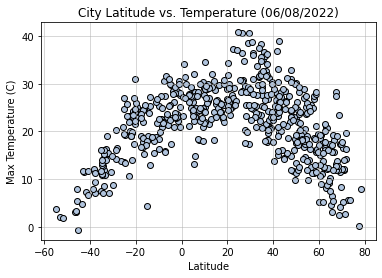

In [14]:
plt.scatter(lat, temp, marker="o", facecolors="lightsteelblue", edgecolors="black")
plt.title("City Latitude vs. Temperature (06/08/2022)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(linestyle='-', linewidth=1, alpha=0.5)

plt.savefig("output_data/lat_vs_temp.png")

## Latitude vs. Humidity Plot

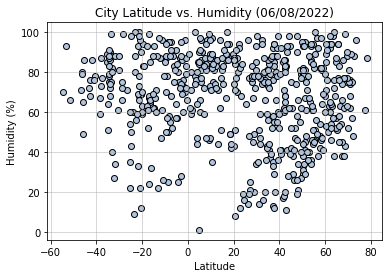

In [15]:
plt.scatter(lat, humidity, marker="o", facecolors="lightsteelblue", edgecolors="black")
plt.title("City Latitude vs. Humidity (06/08/2022)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(linestyle='-', linewidth=1, alpha=0.5)

plt.savefig("output_data/lat_vs_humid.png")

## Latitude vs. Cloudiness Plot

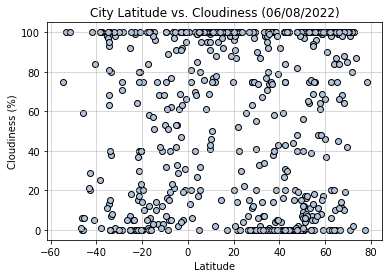

In [16]:
plt.scatter(lat, clouds, marker="o", facecolors="lightsteelblue", edgecolors="black")
plt.title("City Latitude vs. Cloudiness (06/08/2022)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(linestyle='-', linewidth=1, alpha=0.5)

plt.savefig("output_data/lat_vs_clouds.png")

## Latitude vs. Wind Speed Plot

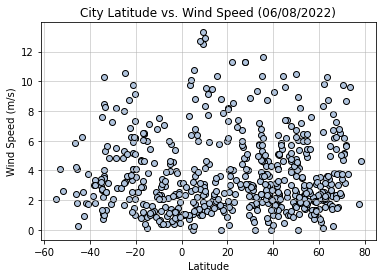

In [17]:
plt.scatter(lat, wind_spd, marker="o", facecolors="lightsteelblue", edgecolors="black")
plt.title("City Latitude vs. Wind Speed (06/08/2022)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(linestyle='-', linewidth=1, alpha=0.5)

plt.savefig("output_data/lat_vs_windspd.png")

## Linear Regression

In [18]:
nth_hem = city_weather.loc[city_weather["Lat"] >=0]
sth_hem = city_weather.loc[city_weather["Lat"] <0]

###  Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.33920722358358957


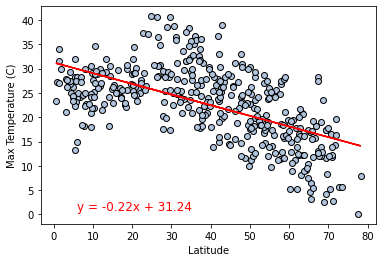

In [19]:
x_values = nth_hem["Lat"]
y_values = nth_hem["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, facecolors="lightsteelblue", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.641971164738603


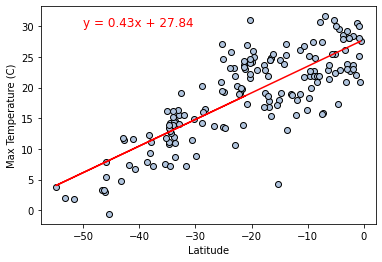

In [20]:
x_values = sth_hem["Lat"]
y_values = sth_hem["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, facecolors="lightsteelblue", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,30),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

### Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.008882805021418451


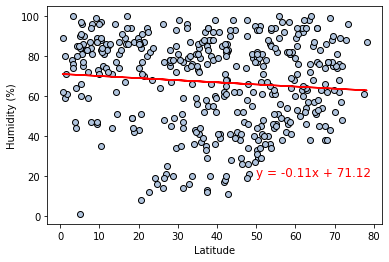

In [21]:
x_values = nth_hem["Lat"]
y_values = nth_hem["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, facecolors="lightsteelblue", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0006365398276620655


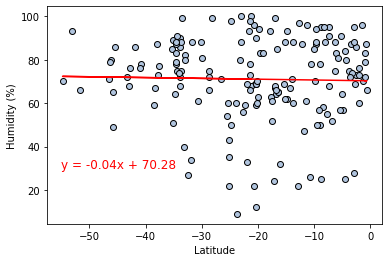

In [22]:
x_values = sth_hem["Lat"]
y_values = sth_hem["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, facecolors="lightsteelblue", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,30),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

### Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.010540876852824099


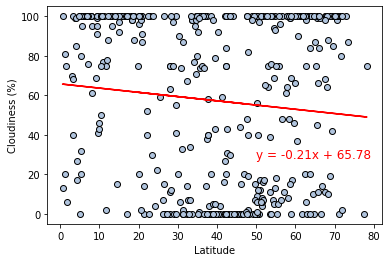

In [28]:
x_values = nth_hem["Lat"]
y_values = nth_hem["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, facecolors="lightsteelblue", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,28),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.00393390437164017


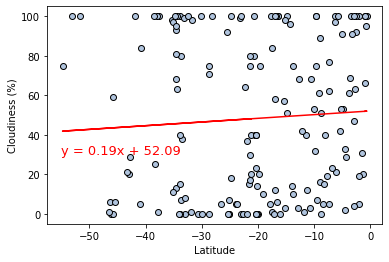

In [24]:
x_values = sth_hem["Lat"]
y_values = sth_hem["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, facecolors="lightsteelblue", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,30),fontsize=13,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

### Wind Speed (m/s) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0018169073974671534


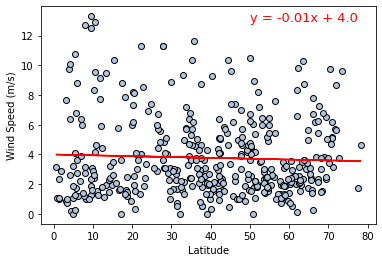

In [25]:
x_values = nth_hem["Lat"]
y_values = nth_hem["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, facecolors="lightsteelblue", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,13),fontsize=13,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.025699173204502126


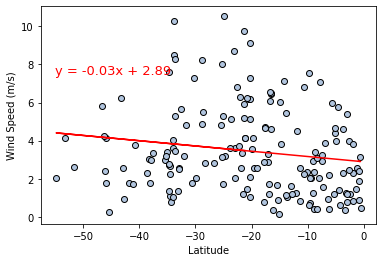

In [26]:
x_values = sth_hem["Lat"]
y_values = sth_hem["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, facecolors="lightsteelblue", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,7.5),fontsize=13,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
print(f"The r-squared is: {rvalue**2}")
plt.show()